## Libraires

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')   

### Data Loading

In [2]:
cars_df=pd.read_csv('cars_price.csv')
cars_df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,NaN,mpfi,3.47,2.68,9.0,111,NaN,21.0,27.0,13495
1,3.0,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111,NaN,21.0,27.0,16500
2,1.0,?,alfa-romero,gas,std,two,hatchback,rwd,NaN,94.5,...,152.0,mpfi,NaN,3.47,9.0,154,NaN,19.0,26.0,16500
3,2.0,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109.0,mpfi,3.19,NaN,10.0,102,5500,24.0,30.0,13950
4,2.0,164,audi,gas,std,NaN,sedan,4wd,front,99.4,...,136.0,mpfi,NaN,3.4,8.0,115,5500,18.0,22.0,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30325,3.0,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80.0,mpfi,NaN,NaN,9.4,135,NaN,NaN,NaN,15645
30326,NaN,168,toyota,gas,std,two,hatchback,rwd,front,94.5,...,98.0,mpfi,3.24,NaN,9.4,112,6600,26.0,29.0,9538
30327,1.0,113,mazda,gas,std,four,sedan,fwd,front,93.1,...,91.0,2bbl,3.03,NaN,9.0,68,5000,31.0,38.0,6695
30328,3.0,186,porsche,gas,std,NaN,hatchback,rwd,front,94.5,...,151.0,mpfi,3.94,NaN,9.5,143,5500,19.0,27.0,22018


## EDA

#### Basic Info about the Data

In [3]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30330 entries, 0 to 30329
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          27286 non-null  float64
 1   normalized-losses  27294 non-null  object 
 2   make               27228 non-null  object 
 3   fuel-type          27309 non-null  object 
 4   aspiration         27355 non-null  object 
 5   num-of-doors       27321 non-null  object 
 6   body-style         27326 non-null  object 
 7   drive-wheels       27215 non-null  object 
 8   engine-location    27352 non-null  object 
 9   wheel-base         27264 non-null  float64
 10  length             27258 non-null  float64
 11  width              27387 non-null  float64
 12  height             27281 non-null  float64
 13  curb-weight        27302 non-null  float64
 14  engine-type        27285 non-null  object 
 15  num-of-cylinders   27298 non-null  object 
 16  engine-size        272

#### Checking Nans

In [4]:
cars_df.isna().sum()

symboling            3044
normalized-losses    3036
make                 3102
fuel-type            3021
aspiration           2975
num-of-doors         3009
body-style           3004
drive-wheels         3115
engine-location      2978
wheel-base           3066
length               3072
width                2943
height               3049
curb-weight          3028
engine-type          3045
num-of-cylinders     3032
engine-size          3059
fuel-system          3081
bore                 2957
stroke               2921
compression-ratio    3003
horsepower           3148
peak-rpm             2999
city-mpg             3101
highway-mpg          3027
price                3043
dtype: int64

#### Data Type of Columns

In [5]:
categorical_columns=cars_df.select_dtypes(include='object').columns
categorical_columns

Index(['normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'engine-type',
       'num-of-cylinders', 'fuel-system', 'bore', 'stroke', 'horsepower',
       'peak-rpm', 'price'],
      dtype='object')

In [6]:
numeric_columns= cars_df.select_dtypes(include='float64').columns
numeric_columns

Index(['symboling', 'wheel-base', 'length', 'width', 'height', 'curb-weight',
       'engine-size', 'compression-ratio', 'city-mpg', 'highway-mpg'],
      dtype='object')

#### Changing Some Columns Data Type

In [ ]:
cars_df['normalized-losses'] = cars_df['normalized-losses'].replace('?', np.nan)
cars_df['normalized-losses']= cars_df['normalized-losses'].astype('float64')

In [ ]:
cars_df['num-of-doors']=cars_df['num-of-doors'].replace('?',np.nan)

In [27]:
cars_df['price']=cars_df['price'].replace('?',np.nan)
cars_df['price']=cars_df['price'].astype('float64')

In [13]:
number_words = {
    'zero': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4,
    'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9, 'ten': 10
}

def words_to_int(x):
    if pd.isna(x):
        return np.nan
    return number_words.get(str(x).lower(), np.nan)  # Returns NaN if word not found

cars_df['num-of-doors'] = cars_df['num-of-doors'].apply(words_to_int)

In [28]:
numeric_columns= cars_df.select_dtypes(include='float64').columns
numeric_columns

Index(['symboling', 'normalized-losses', 'num-of-doors', 'wheel-base',
       'length', 'width', 'height', 'curb-weight', 'engine-size',
       'compression-ratio', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

### Statistical Summary & Distribution

In [15]:
cars_df[numeric_columns].describe()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,27286.000000,21768.000000,27061.000000,27264.000000,27258.000000,27387.000000,27281.000000,27302.000000,27271.000000,27327.000000,27229.000000,27303.000000
mean,0.839075,122.348447,3.130187,98.807875,174.158302,65.918114,53.732059,2560.265988,127.322834,10.128243,25.158507,30.709885
std,1.239600,35.466905,0.991508,6.037800,12.366150,2.143679,2.438541,522.483478,41.863332,3.943566,6.517298,6.862626
min,-2.000000,65.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.500000,19.000000,25.000000
50%,1.000000,115.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,150.000000,4.000000,102.400000,183.500000,66.900000,55.500000,2954.000000,146.000000,9.400000,30.000000,34.000000
max,3.000000,256.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


#### Histogram for Numerical Features

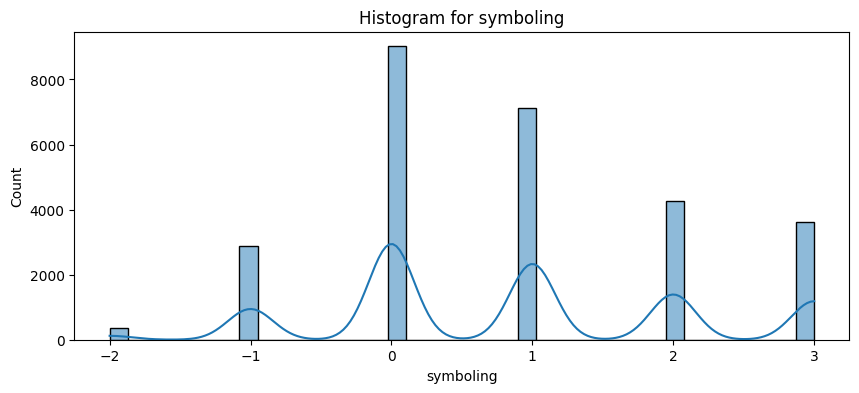

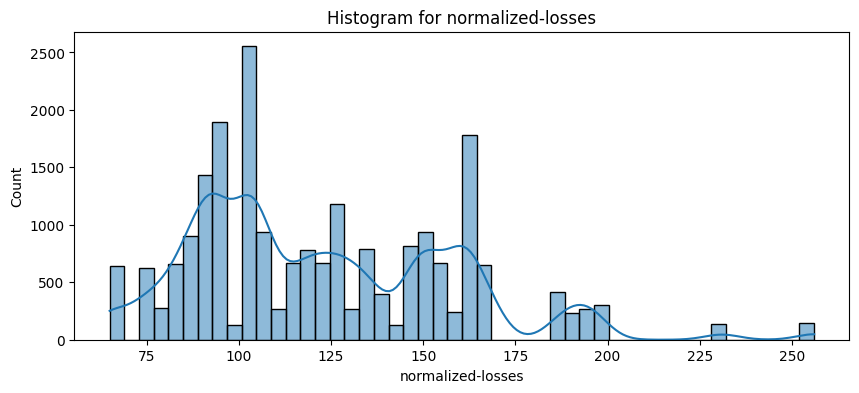

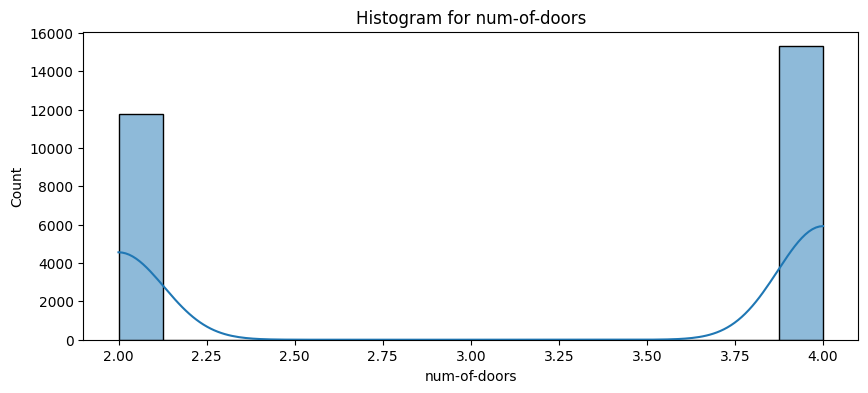

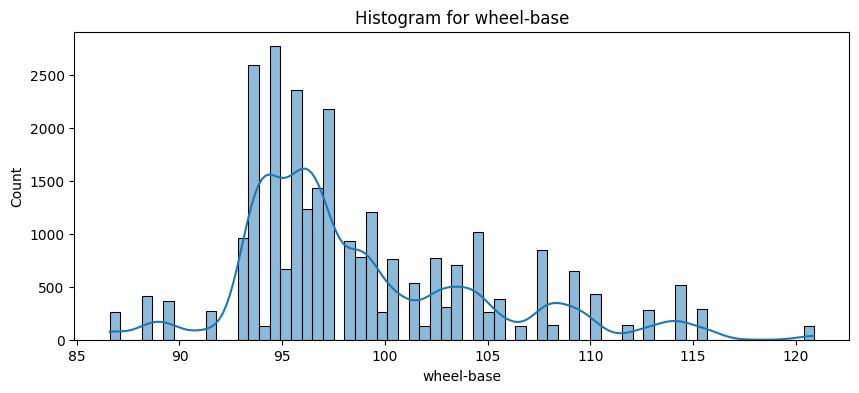

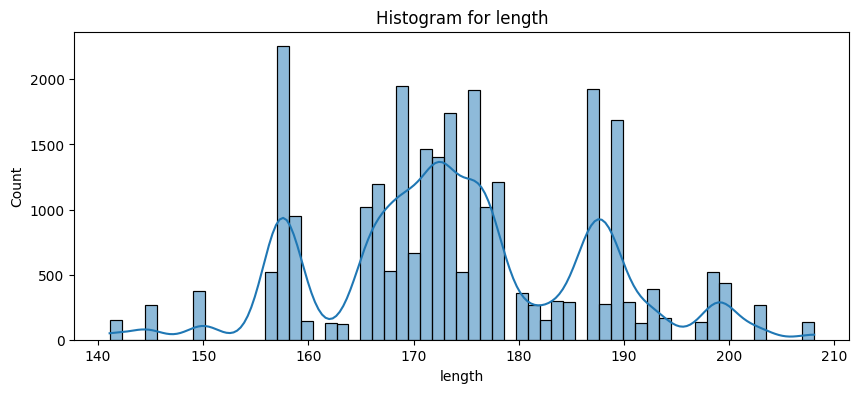

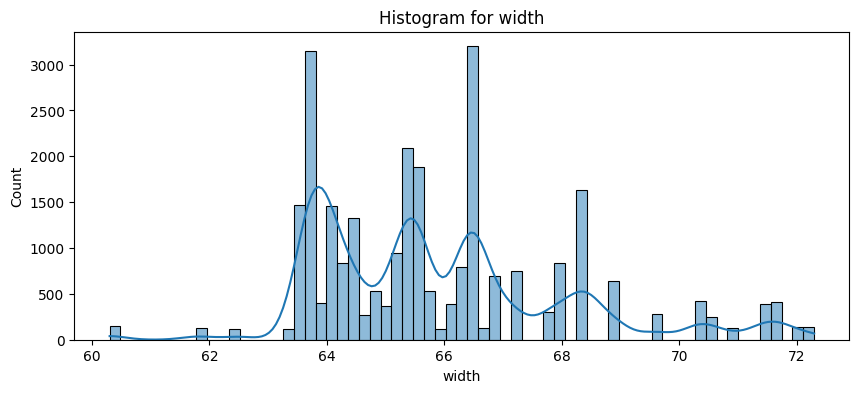

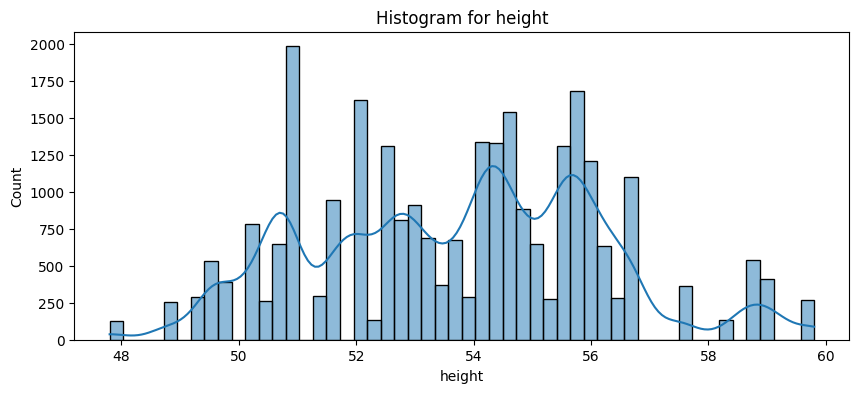

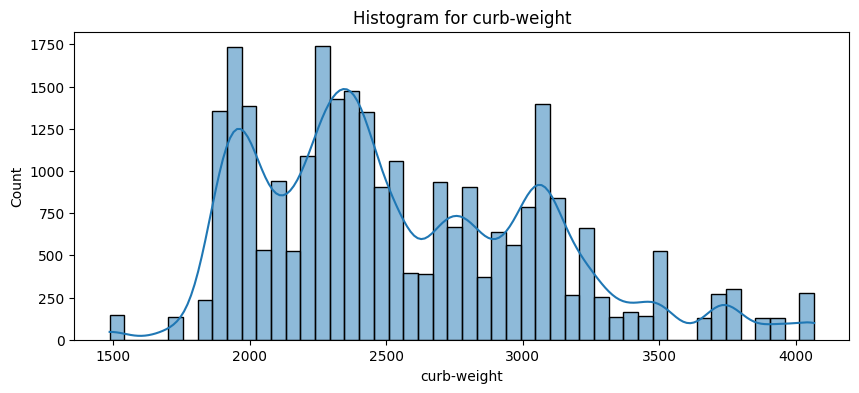

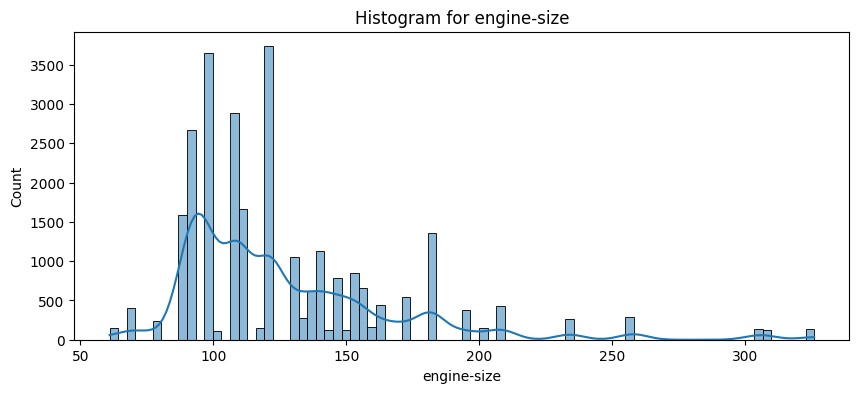

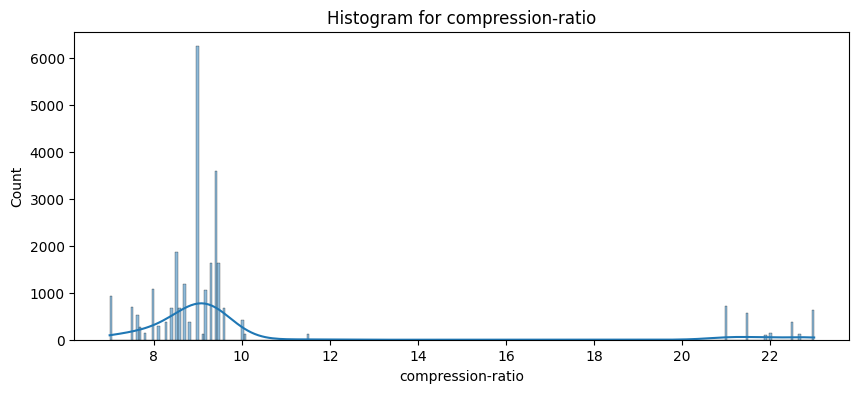

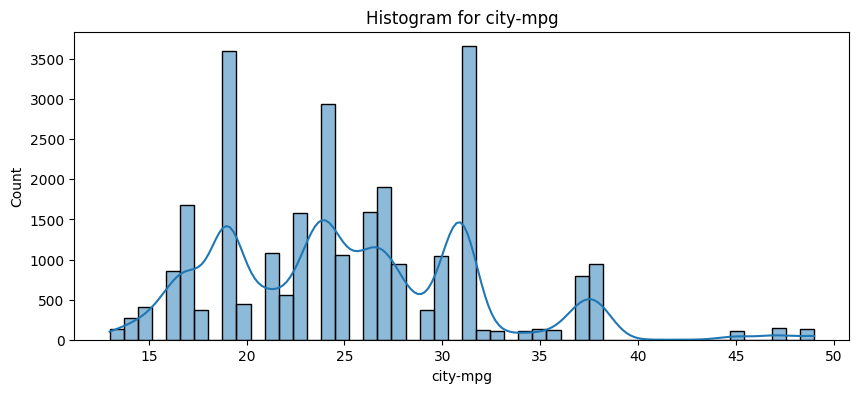

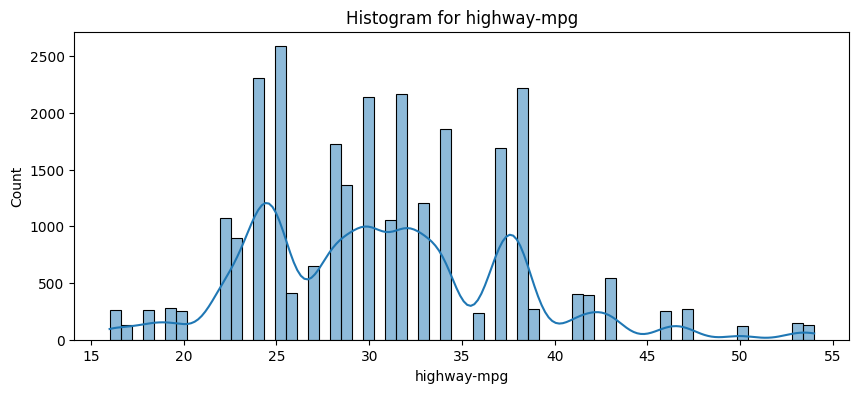

In [19]:
for cols in numeric_columns:
    plt.figure(figsize=(10,4))
    sns.histplot(data=cars_df,x=cols  ,kde=True)
    plt.title('Histogram for '+cols)
    plt.show()

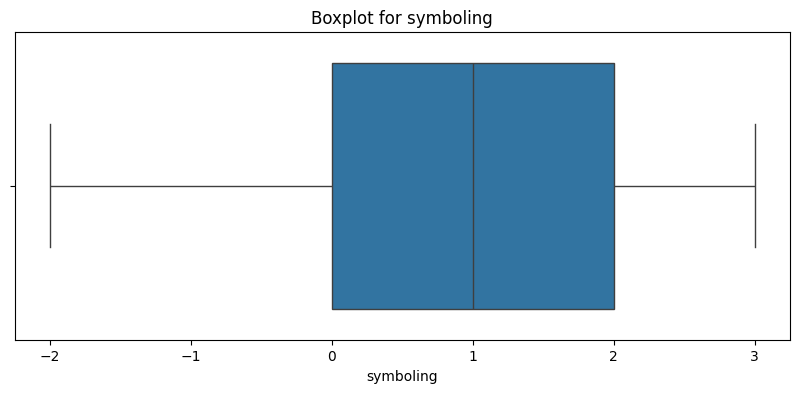

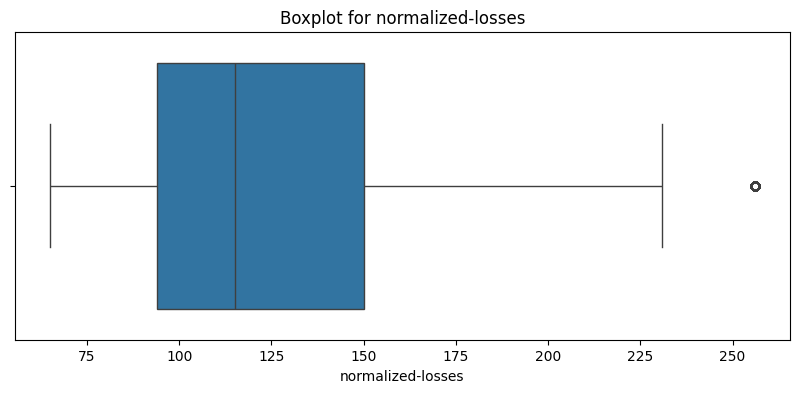

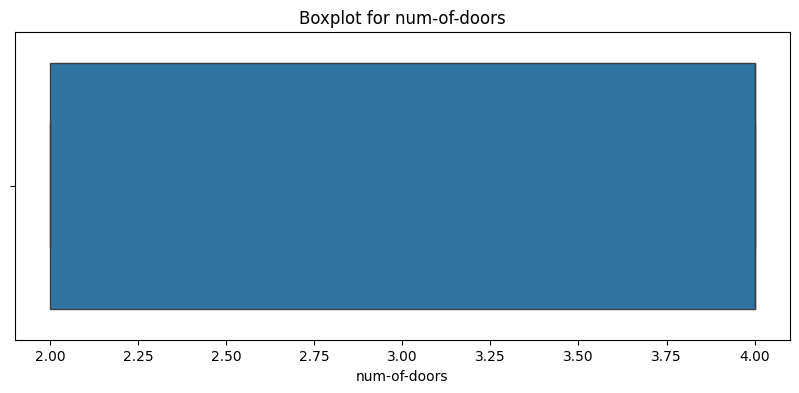

In [22]:
for cols in numeric_columns[:3]:
    plt.figure(figsize=(10,4))
    sns.boxplot(data=cars_df,x=cols)
    plt.title('Boxplot for '+cols)
    plt.show()

#### Relationships Between Features

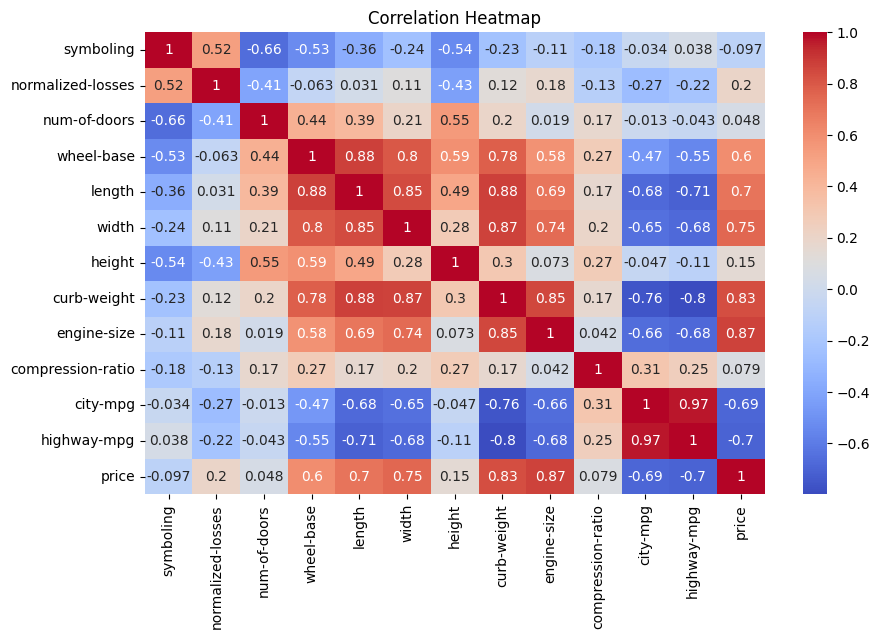

In [29]:
correlation= cars_df[numeric_columns].corr()

plt.figure(figsize=(10,6))
sns.heatmap(correlation,annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Text(0.5, 1.0, 'Average Price by Fuel Type')

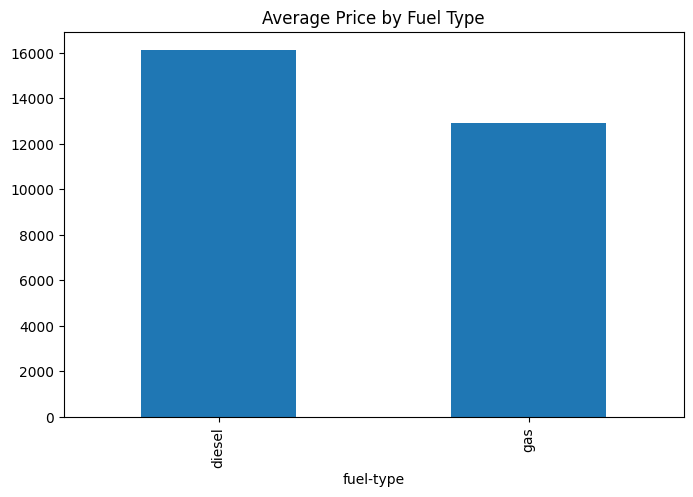

In [30]:
avg_fuel_price= cars_df.pivot_table(values='price',index='fuel-type',aggfunc='mean')
avg_fuel_price.plot(kind='bar',figsize=(8,5),legend=False)
plt.title('Average Price by Fuel Type')

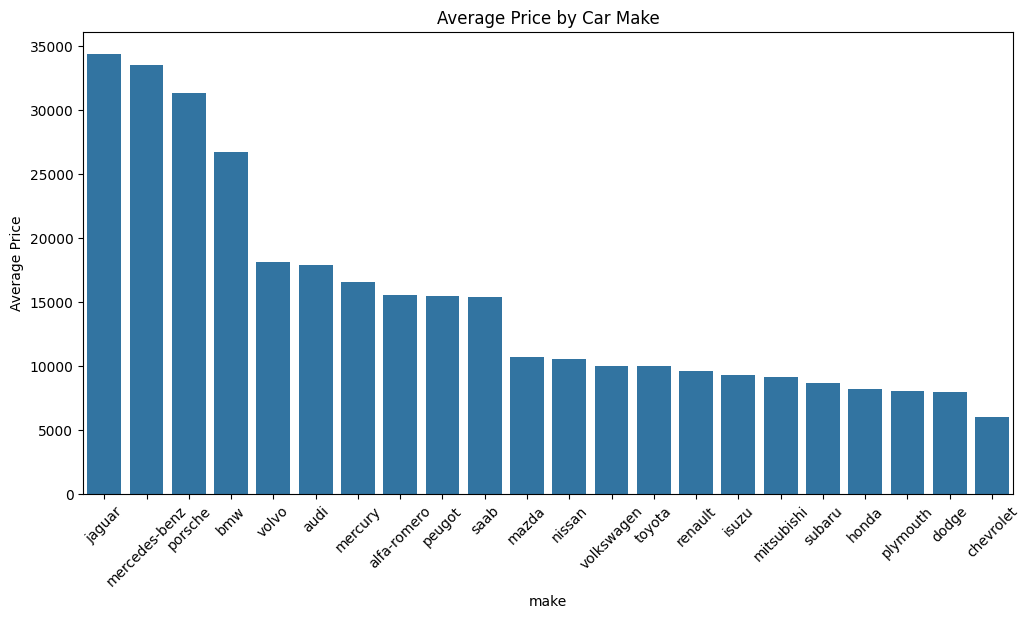

In [32]:
# Calculate average price by car make
avg_price = cars_df.groupby('make')['price'].mean().sort_values(ascending=False)

# Bar plot
plt.figure(figsize=(12,6))
sns.barplot(x=avg_price.index, y=avg_price.values)
plt.xticks(rotation=45)  
plt.ylabel('Average Price')
plt.title('Average Price by Car Make')
plt.show()


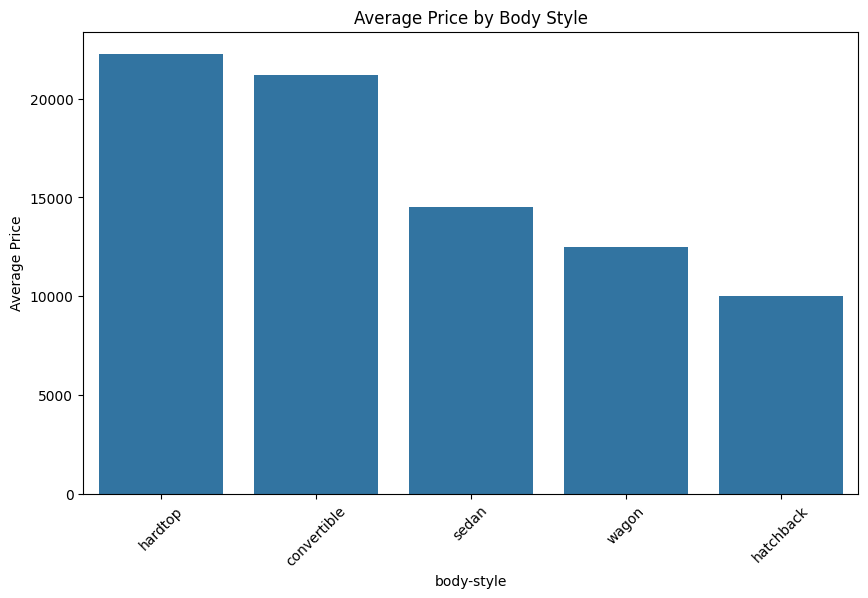

In [33]:
avg_price_body = cars_df.groupby('body-style')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_price_body.index, y=avg_price_body.values)
plt.xticks(rotation=45) 
plt.ylabel('Average Price')
plt.title('Average Price by Body Style')
plt.show()


The most common engine type is: ohc


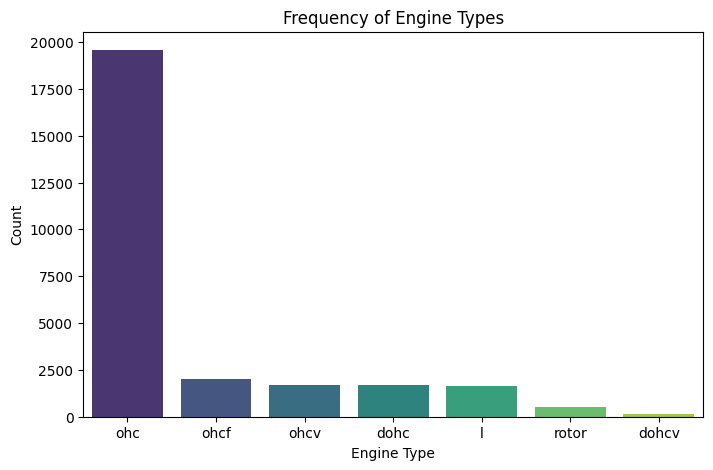

In [36]:
engine_counts = cars_df['engine-type'].value_counts()
most_common_engine = engine_counts.idxmax()
print(f"The most common engine type is: {most_common_engine}")

# Plot a bar chart
plt.figure(figsize=(8,5))
sns.barplot(x=engine_counts.index, y=engine_counts.values, palette="viridis")
plt.title("Frequency of Engine Types")
plt.xlabel("Engine Type")
plt.ylabel("Count")
plt.show()

## Data Preprocessing

In [37]:
missing_data = cars_df.isna().sum()
missing_percentage = (missing_data / len(cars_df)) * 100
missing_summary = pd.DataFrame({'Missing Count': missing_data, 'Missing %': missing_percentage})
print("Columns with missing values:\n", missing_summary[missing_summary['Missing Count'] > 0])


Columns with missing values:
                    Missing Count  Missing %
symboling                   3044  10.036268
normalized-losses           8562  28.229476
make                        3102  10.227498
fuel-type                   3021   9.960435
aspiration                  2975   9.808770
num-of-doors                3269  10.778107
body-style                  3004   9.904385
drive-wheels                3115  10.270359
engine-location             2978   9.818661
wheel-base                  3066  10.108803
length                      3072  10.128586
width                       2943   9.703264
height                      3049  10.052753
curb-weight                 3028   9.983515
engine-type                 3045  10.039565
num-of-cylinders            3032   9.996703
engine-size                 3059  10.085724
fuel-system                 3081  10.158259
bore                        2957   9.749423
stroke                      2921   9.630729
compression-ratio           3003   9.901088
ho